Connecting to the data warehouse 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pyodbc 
conn = pyodbc.connect('Driver={SQL Server};'
                      'Your PC Name Here\SQLEXPRESS;'
                      'Database=StockDB;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()

sql_query = pd.read_sql_query('SELECT [FullDate],[StockSymbol],[S_Adj_Close] FROM [StockDB].[dbo].[Stock_Details]',conn)
print(sql_query)
print(type(sql_query))

C:\Users\sonia\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


         FullDate StockSymbol  S_Adj_Close
0      2012-08-03        AAPL    19.000000
1      2012-08-06        AAPL    19.209999
2      2012-08-07        AAPL    19.160000
3      2012-08-08        AAPL    19.129999
4      2012-08-09        AAPL    19.240000
...           ...         ...          ...
31851  2020-06-26           V   188.979996
31852  2020-06-29           V   191.089996
31853  2020-06-30           V   192.880005
31854  2020-07-01           V   193.490005
31855  2020-07-02           V   195.369995

[31856 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>


In [2]:
sql_query.head(2)# showing the first 2

,FullDate,StockSymbol,S_Adj_Close
0,2012-08-03,AAPL,19.000000
1,2012-08-06,AAPL,19.209999


In [3]:
sql_query.info()#getting info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31856 entries, 0 to 31855
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FullDate     31856 non-null  object 
 1   StockSymbol  31856 non-null  object 
 2   S_Adj_Close  31856 non-null  float64
dtypes: float64(1), object(2)
memory usage: 746.8+ KB


Setting the date as the index

In [4]:
df = sql_query.set_index('FullDate')#setting date as index
df.head(3)

,StockSymbol,S_Adj_Close
FullDate,,
2012-08-03,AAPL,19.000000
2012-08-06,AAPL,19.209999
2012-08-07,AAPL,19.160000


Changing StockSymbol as the column

In [5]:
stock_tickers = df.pivot(columns='StockSymbol')
stock_tickers.columns = [col[1] for col in stock_tickers.columns]
stock_tickers.head()

,AAPL,AMZN,BA,FB,GE,GOOG,HD,J,JPM,MSFT,NFLX,OPK,PG,TSLA,UNH,V
FullDate,,,,,,,,,,,,,,,,
2012-08-03,19.000000,234.970001,59.820000,21.090000,15.990000,319.470001,43.570000,37.639999,28.809999,24.670000,7.70,4.29,51.189999,5.45,45.049999,30.820000
2012-08-06,19.209999,233.990005,59.880001,21.920000,16.000000,320.209991,43.330002,37.980000,28.969999,24.830000,8.11,4.27,51.430000,5.65,44.520000,30.830000
2012-08-07,19.160000,236.559998,61.169998,20.719999,16.110001,319.070007,43.660000,37.959999,29.540001,25.090000,8.27,4.27,51.750000,6.05,45.860001,30.680000
2012-08-08,19.129999,234.380005,61.290001,20.719999,16.030001,319.920013,43.990002,38.230000,29.660000,25.150000,8.26,4.26,52.139999,5.82,46.029999,30.860001
2012-08-09,19.240000,234.059998,61.029999,21.010000,16.070000,319.980011,44.290001,38.290001,29.469999,25.290001,8.27,4.25,52.150002,5.88,45.410000,30.240000


Checking for duplicate values

In [6]:
#looking for any duplicate values
stock_tickers.duplicated().sum()

0

Using describe() to view basic statistical details like  mean, std etc

In [7]:
stock_tickers.describe()

,AAPL,AMZN,BA,FB,GE,GOOG,HD,J,JPM,MSFT,NFLX,OPK,PG,TSLA,UNH,V
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,33.761010,936.519066,185.669789,117.673546,18.370809,808.048392,128.036635,57.396434,71.893395,69.590497,164.497504,7.018011,78.469563,51.834219,150.078589,93.320794
std,16.847336,653.778642,105.540670,58.969127,6.230230,311.460875,54.975634,15.320281,27.791218,43.382331,128.110228,3.696880,18.135514,31.171766,77.971893,47.868716
min,12.230000,220.600006,57.340000,17.730000,5.480000,319.070007,43.330002,33.849998,28.809999,22.190001,7.690000,1.150000,51.189999,5.450000,44.520000,29.850000
25%,21.690001,338.380005,110.424999,72.670002,12.610000,539.294983,70.829998,45.720001,48.690001,37.094999,59.670000,3.775000,66.145000,39.619999,74.974998,52.040001
50%,28.090000,740.340027,129.179993,118.419998,19.930000,758.880005,119.209999,54.540001,58.980000,51.959999,112.510002,7.170000,73.239998,47.700001,129.220001,76.959999
75%,42.825001,1615.789978,314.100006,171.945000,22.845000,1086.375000,174.875000,64.485001,98.905003,98.774998,293.300003,9.385000,83.530003,61.770000,228.860001,132.019997
max,91.470001,2890.300049,430.299988,242.240005,28.690001,1526.689941,255.419998,103.370003,137.410004,205.759995,485.640015,19.120001,125.510002,241.729996,309.239990,212.630005


Calculating the return of the stocks

returns are calculated as the change in price as a percentage of the previous period’s price

                      


In [8]:
stocks_returns = stock_tickers.pct_change(1).dropna()
stocks_returns

,AAPL,AMZN,BA,FB,GE,GOOG,HD,J,JPM,MSFT,NFLX,OPK,PG,TSLA,UNH,V
FullDate,,,,,,,,,,,,,,,,
2012-08-06,0.011053,-0.004171,0.001003,0.039355,0.000625,0.002316,-0.005508,0.009033,0.005554,0.006486,0.053247,-0.004662,0.004688,0.036697,-0.011765,0.000324
2012-08-07,-0.002603,0.010983,0.021543,-0.054745,0.006875,-0.003560,0.007616,-0.000527,0.019676,0.010471,0.019729,0.000000,0.006222,0.070796,0.030099,-0.004865
2012-08-08,-0.001566,-0.009215,0.001962,0.000000,-0.004966,0.002664,0.007558,0.007113,0.004062,0.002391,-0.001209,-0.002342,0.007536,-0.038017,0.003707,0.005867
2012-08-09,0.005750,-0.001365,-0.004242,0.013996,0.002495,0.000188,0.006820,0.001569,-0.006406,0.005567,0.001211,-0.002347,0.000192,0.010309,-0.013469,-0.020091
2012-08-10,0.001559,-0.005597,-0.000983,0.038077,0.001867,-0.000563,-0.001806,-0.008096,0.001357,-0.002768,0.035066,0.000000,0.000575,0.018707,-0.002202,0.004299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,-0.030752,-0.022403,-0.027848,-0.083164,-0.028486,-0.056496,-0.017780,-0.013661,-0.054737,-0.020014,-0.048314,0.037313,-0.022535,-0.026623,-0.031525,-0.024317
2020-06-29,0.023003,-0.004638,0.143992,0.021103,0.049383,0.025789,0.021189,0.028308,0.004362,0.010722,0.008660,0.061151,0.021046,0.051680,0.010045,0.011165
2020-06-30,0.008418,0.029265,-0.057535,0.029143,0.004412,0.013362,0.017849,-0.000354,0.011401,0.025561,0.017440,0.155932,0.016250,0.069797,0.017916,0.009367


Looking at the corelation between the stocks

[]

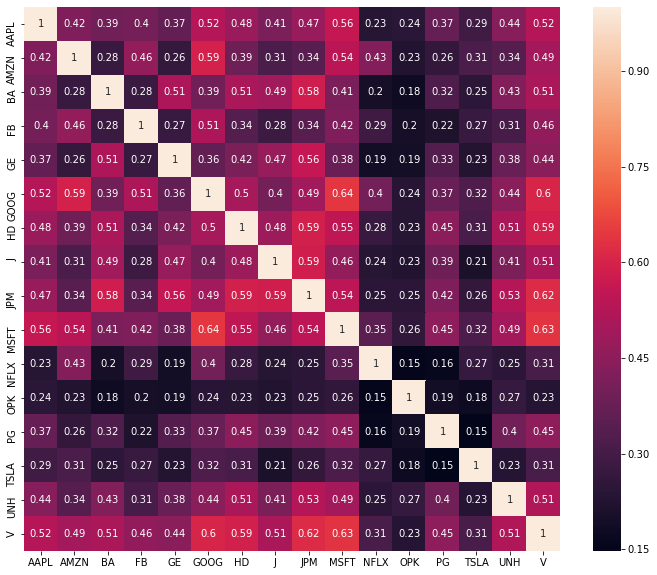

In [9]:
ax, fig = plt.subplots(figsize=(12,10))
sns.heatmap(stocks_returns.corr(),annot=True)
plt.plot()

C:\Users\sonia\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\sonia\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\sonia\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


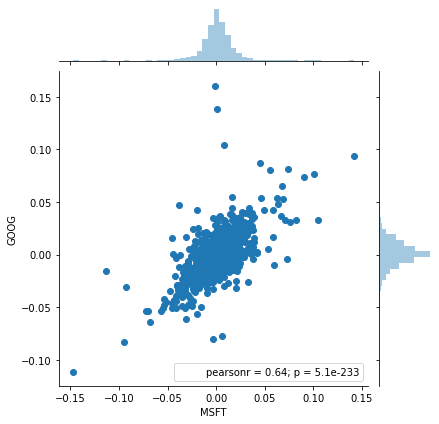

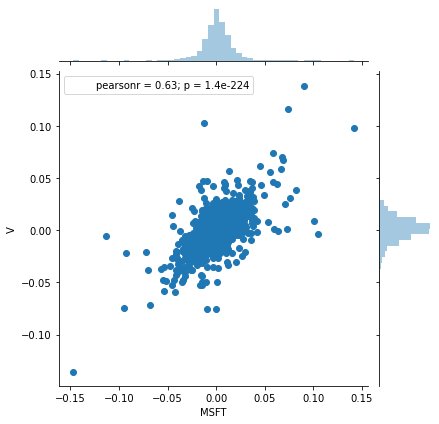

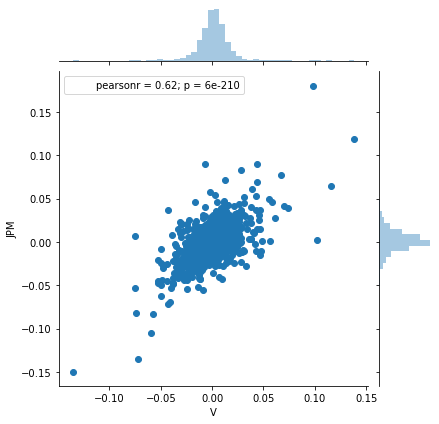

In [10]:
from scipy.stats import stats
sns.jointplot('MSFT','GOOG', stocks_returns, kind = 'scatter').annotate(stats.pearsonr)
sns.jointplot('MSFT','V', stocks_returns, kind = 'scatter').annotate(stats.pearsonr)
sns.jointplot('V', 'JPM', stocks_returns, kind = 'scatter').annotate(stats.pearsonr)
plt.show()


## Showing the effect of Diversification in a Portfolio

In [11]:
# Extracting the list of all the stocks
symbols = list(stocks_returns.columns)
symbols

['AAPL',
 'AMZN',
 'BA',
 'FB',
 'GE',
 'GOOG',
 'HD',
 'J',
 'JPM',
 'MSFT',
 'NFLX',
 'OPK',
 'PG',
 'TSLA',
 'UNH',
 'V']

In [12]:
# index slicing
symbols[0:6]

['AAPL', 'AMZN', 'BA', 'FB', 'GE', 'GOOG']

I started by creating a portfolio with the first stock then gradually adding a new stock at each turn until the 16 portfolios were completed

In [14]:
portfolios = []
for p in range(1, len(symbols) + 1):
    portfolios.append(symbols[0:p])
portfolios

[['AAPL'],
 ['AAPL', 'AMZN'],
 ['AAPL', 'AMZN', 'BA'],
 ['AAPL', 'AMZN', 'BA', 'FB'],
 ['AAPL', 'AMZN', 'BA', 'FB', 'GE'],
 ['AAPL', 'AMZN', 'BA', 'FB', 'GE', 'GOOG'],
 ['AAPL', 'AMZN', 'BA', 'FB', 'GE', 'GOOG', 'HD'],
 ['AAPL', 'AMZN', 'BA', 'FB', 'GE', 'GOOG', 'HD', 'J'],
 ['AAPL', 'AMZN', 'BA', 'FB', 'GE', 'GOOG', 'HD', 'J', 'JPM'],
 ['AAPL', 'AMZN', 'BA', 'FB', 'GE', 'GOOG', 'HD', 'J', 'JPM', 'MSFT'],
 ['AAPL', 'AMZN', 'BA', 'FB', 'GE', 'GOOG', 'HD', 'J', 'JPM', 'MSFT', 'NFLX'],
 ['AAPL',
  'AMZN',
  'BA',
  'FB',
  'GE',
  'GOOG',
  'HD',
  'J',
  'JPM',
  'MSFT',
  'NFLX',
  'OPK'],
 ['AAPL',
  'AMZN',
  'BA',
  'FB',
  'GE',
  'GOOG',
  'HD',
  'J',
  'JPM',
  'MSFT',
  'NFLX',
  'OPK',
  'PG'],
 ['AAPL',
  'AMZN',
  'BA',
  'FB',
  'GE',
  'GOOG',
  'HD',
  'J',
  'JPM',
  'MSFT',
  'NFLX',
  'OPK',
  'PG',
  'TSLA'],
 ['AAPL',
  'AMZN',
  'BA',
  'FB',
  'GE',
  'GOOG',
  'HD',
  'J',
  'JPM',
  'MSFT',
  'NFLX',
  'OPK',
  'PG',
  'TSLA',
  'UNH'],
 ['AAPL',
  'AMZN',
  'BA',

1. [['AAPL'],
2. ['AAPL','AMZN'],
3. ['AAPL','AMZN','BA'],
4. ['AAPL','AMZN','BA','FB'],
5. ['AAPL','AMZN','BA','FB','GE'],
6. ['AAPL','AMZN','BA','FB','GE','GOOG'],
7. ['AAPL','AMZN','BA','FB','GE','GOOG','HD'],
8. ['AAPL','AMZN','BA','FB','GE','GOOG','HD','J'],
9. ['AAPL','AMZN','BA','FB','GE','GOOG','HD','J','JPM'],
10. ['AAPL','AMZN','BA','FB','GE','GOOG','HD','J','JPM','MSFT'],
11. ['AAPL','AMZN','BA','FB','GE','GOOG','HD','J','JPM','MSFT','NFLX'],
12. ['AAPL','AMZN','BA','FB','GE','GOOG’,'HD','J','JPM','MSFT','NFLX','OPK'],
13. ['AAPL','AMZN','BA','FB','GE','GOOG','HD','J','JPM','MSFT','NFLX','OPK','PG'],
14. ['AAPL','AMZN','BA','FB','GE','GOOG','HD','J','JPM','MSFT','NFLX','OPK','PG','TSL'],
15. ['AAPL','AMZN','BA','FB','GE','GOOG','HD','J','JPM','MSFT','NFLX','OPK','PG','TSLA','UNH',
16. ['AAPL','AMZN','BA','FB','GE','GOOG','HD','J','JPM','MSFT','NFLX','OPK','PG','TSLA','UNH','V']]


In [15]:
# Calculate the risk of each portfolio
portfolio_risks = []

for port in portfolios:
    NewPort = stocks_returns[port]
    
    num_stocks = len(NewPort.columns)
    weights = [1 / num_stocks] * num_stocks
    stocks_matrix = NewPort.cov()
    
    var_portfolio = np.dot(np.transpose(weights), np.dot(stocks_matrix, weights))
    std_portfolio = np.sqrt(var_portfolio)
    std_portfolio_ann = std_portfolio * np.sqrt(252)
    
    portfolio_risks.append(std_portfolio_ann)

In [16]:
# Creating a dataframe of all the portfolio risks that was generated
port_risks = pd.DataFrame(portfolio_risks)

In [17]:
port_risks.rename(columns={port_risks.columns[0] : 'The Risk of each Portfolio'}, inplace=True)
port_risks

,The Risk of each Portfolio
0,0.278282
1,0.243854
2,0.238518
3,0.236767
4,0.228002
5,0.220667
6,0.210955
7,0.206006
8,0.204815
9,0.203414


In [18]:
# Comparing the Portfolio Risk with the individual risks of each stocks
stock_individual_risks = np.std(stocks_returns) * np.sqrt(252)
stock_individual_risks

AAPL    0.278212
AMZN    0.299893
BA      0.365142
FB      0.361510
GE      0.320635
GOOG    0.253000
HD      0.229832
J       0.270711
JPM     0.262338
MSFT    0.258900
NFLX    0.470651
OPK     0.583610
PG      0.182024
TSLA    0.536487
UNH     0.257894
V       0.241757
dtype: float64

C:\Users\sonia\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


[Text(0, 0.19, '19%'),
 Text(0, 0.2, '20%'),
 Text(0, 0.21, '21%'),
 Text(0, 0.22, '22%'),
 Text(0, 0.23, '23%'),
 Text(0, 0.24, '24%'),
 Text(0, 0.25, '25%'),
 Text(0, 0.26, '26%'),
 Text(0, 0.27, '27%'),
 Text(0, 0.28, '28%'),
 Text(0, 0.29000000000000004, '29%')]

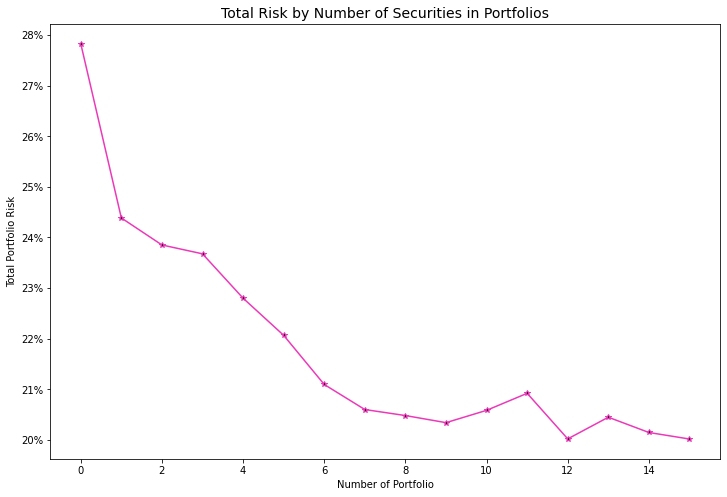

In [19]:
plt.figure(figsize=(12, 8))
plt.title('Total Risk by Number of Securities in Portfolios', fontsize=14)
plt.plot(port_risks, marker='*', color='#eb39b8', markerfacecolor='#330526')
plt.xlabel('Number of Portfolio')
plt.ylabel('Total Portfolio Risk')
plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])

C:\Users\sonia\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


[Text(0, 0.15000000000000002, '15%'),
 Text(0, 0.2, '20%'),
 Text(0, 0.25, '25%'),
 Text(0, 0.30000000000000004, '30%'),
 Text(0, 0.35000000000000003, '35%'),
 Text(0, 0.4, '40%'),
 Text(0, 0.45000000000000007, '45%'),
 Text(0, 0.5, '50%'),
 Text(0, 0.55, '55%'),
 Text(0, 0.6000000000000001, '60%'),
 Text(0, 0.65, '65%')]

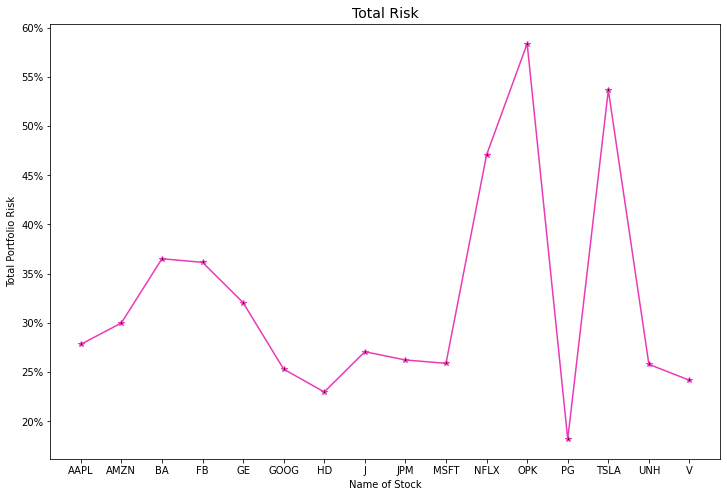

In [20]:
plt.figure(figsize=(12, 8))
plt.title('Total Risk', fontsize=14)
plt.plot(stock_individual_risks, marker='*', color='#eb39b8', markerfacecolor='#330526')
plt.xlabel('Name of Stock')
plt.ylabel('Total Portfolio Risk')
plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])

# 5. Stage Four - Modelling 

Selecting the modeling techniques.

Building the model

Assessing the  model. 

## Creating Random Allocation

In [21]:
Stocks=stock_tickers.columns
Stocks

Index(['AAPL', 'AMZN', 'BA', 'FB', 'GE', 'GOOG', 'HD', 'J', 'JPM', 'MSFT',
       'NFLX', 'OPK', 'PG', 'TSLA', 'UNH', 'V'],
      dtype='object')

Creating a function to calculate the annual return, annual standard deviation and annual Sharpe ratio of the portfolio, when passed the arguments of the the weights ,the mean of the daily return, the co-variance matrix and the risk free rate.

In [22]:
def get_port(weights, r_mean, p_cov, rfr):
    p_return = np.sum( r_mean * weights) * 252
    p_std = np.sqrt(np.dot(weights.T, np.dot(p_cov, weights))) * np.sqrt(252)
    s_ratio = (p_return - rfr) / p_std
    return p_return, p_std, s_ratio

Creating a function to generate the random portfoilo that will generate 150000 random portfolios with the sixteen stocks following the weight constraints. Once created, the portfolios are then passed to the first function to calculate the calculates annualised return, annualised volatility, and annualised Sharpe ratio, and the results containing all those information with the weight allocated to each stock are stored in a DataFrame.

In [23]:
def random_portfolios(num_port, r_mean, p_cov, rfr):
    matrix = np.zeros((len(r_mean)+3, num_port))
    for i in range(num_port):
        weights = np.random.random(len(r_mean))
        weights /= np.sum(weights)
        p_return, p_std, s_ratio = get_port(weights, r_mean, p_cov, rfr)
        matrix[0,i] = p_return
        matrix[1,i] = p_std
        matrix[2,i] = s_ratio
        #iterating through the weight vector and at the same time adding catculations to results array
        for p in range(len(weights)):
            matrix[p+3,i] = weights[p]
            
    results = pd.DataFrame(matrix.T,columns=['Port_Return','Port_std','Port_S_Ratio'] + [Symbol for Symbol in Stocks])
        
    return results

In [24]:
rfr = 0.11
num_port = 150000
r_mean = stock_tickers.pct_change().mean()
p_cov = stock_tickers.pct_change().cov()


port_results = random_portfolios(num_port, r_mean, p_cov, rfr)

In [25]:
#https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html

Visualising the results of all the portfolios generated, and the min and max 

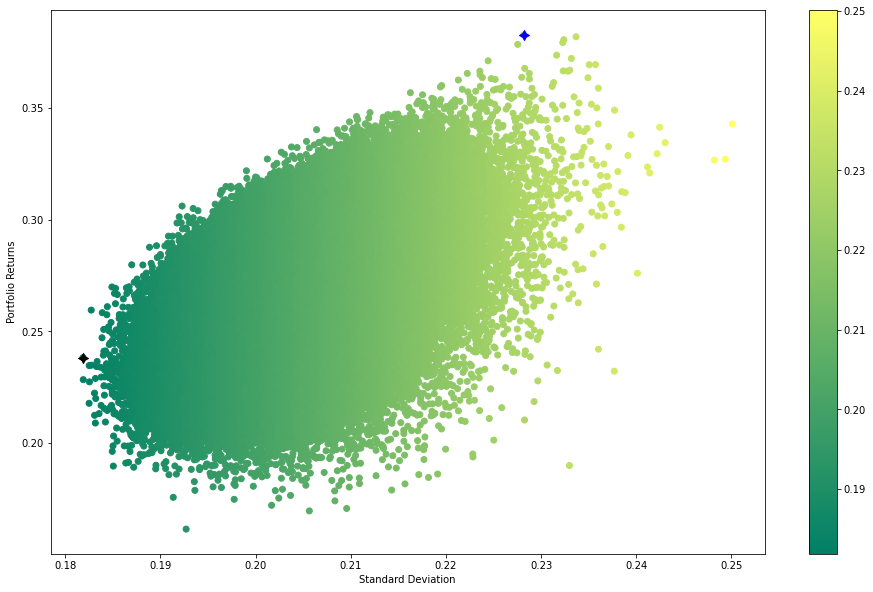

In [26]:
#getting the location of portfolio with highest Sharpe Ratio
max_s_port = port_results.iloc[port_results['Port_S_Ratio'].idxmax()]
#getting the location of positon of portfolio with minimum standard deviation
min_vol_port = port_results.iloc[port_results['Port_std'].idxmin()]
#creating a scatter plot coloured by the Sharpe Ratio
plt.subplots(figsize=(16,10))
plt.scatter(port_results.Port_std,port_results.Port_Return,c=port_results.Port_std,cmap='summer')
plt.xlabel('Standard Deviation')
plt.ylabel('Portfolio Returns')
plt.colorbar()
#plotting a blue star to show the location of the portfolio with highest Sharpe Ratio
plt.scatter(max_s_port [1],max_s_port [0],marker=(4,1,0),s=100,color='blue')
#ploting a black star to show the location of the minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(4,1,0),s=100, color='black')
plt.show()

Looking at the first 3 Portfolio

In [27]:
port_results.head(3)

,Port_Return,Port_std,Port_S_Ratio,AAPL,AMZN,BA,FB,GE,GOOG,HD,J,JPM,MSFT,NFLX,OPK,PG,TSLA,UNH,V
0,0.235532,0.201048,0.624389,0.045085,0.055671,0.045370,0.111281,0.050564,0.081331,0.012328,0.108666,0.068251,0.031266,0.053146,0.110736,0.090899,0.003064,0.107149,0.025193
1,0.273470,0.208211,0.785116,0.069038,0.089277,0.040415,0.070602,0.067667,0.060703,0.008666,0.059218,0.057485,0.032289,0.096059,0.100321,0.072095,0.053655,0.007366,0.115145
2,0.303297,0.208745,0.925995,0.057920,0.130633,0.077012,0.067150,0.013934,0.112783,0.051233,0.119076,0.069626,0.043063,0.079959,0.016434,0.000483,0.073307,0.033568,0.053819


Looking at the last 3 Portfolio

In [28]:
port_results.tail(3)

,Port_Return,Port_std,Port_S_Ratio,AAPL,AMZN,BA,FB,GE,GOOG,HD,J,JPM,MSFT,NFLX,OPK,PG,TSLA,UNH,V
149997,0.293213,0.206577,0.886900,0.125601,0.056274,0.020372,0.080323,0.008653,0.057236,0.099489,0.114395,0.050365,0.092090,0.112735,0.064197,0.000884,0.021271,0.018680,0.077434
149998,0.259745,0.199391,0.751013,0.089538,0.077386,0.040339,0.080903,0.084123,0.087862,0.066712,0.071462,0.050689,0.058460,0.038506,0.043459,0.039249,0.063004,0.067969,0.040339
149999,0.278103,0.208073,0.807903,0.068963,0.048911,0.079702,0.103051,0.095597,0.000293,0.049288,0.083102,0.035450,0.091114,0.088696,0.059966,0.055086,0.078162,0.038594,0.024027


Checking on the the Maximum Sharp ratio Portfolio

In [29]:
max_s_port.to_frame().T

,Port_Return,Port_std,Port_S_Ratio,AAPL,AMZN,BA,FB,GE,GOOG,HD,J,JPM,MSFT,NFLX,OPK,PG,TSLA,UNH,V
78700,0.382699,0.228174,1.195138,0.023909,0.117507,0.005378,0.073282,0.003888,0.015458,0.151712,0.041175,0.043621,0.075581,0.159664,0.012647,0.00459,0.151242,0.007459,0.112887


Checking on the Minimum Variance Portfolio

In [30]:
min_vol_port.to_frame().T

,Port_Return,Port_std,Port_S_Ratio,AAPL,AMZN,BA,FB,GE,GOOG,HD,J,JPM,MSFT,NFLX,OPK,PG,TSLA,UNH,V
31297,0.238261,0.181863,0.705263,0.140461,0.142735,0.024995,0.016202,0.022117,0.019945,0.108802,0.104795,0.000693,0.012128,0.019329,0.037975,0.158852,0.012125,0.147117,0.031728


In [31]:
0.034163+0.007953+0.033153+0.079652+0.061539+0.108065+0.106369+0.04628+0.089995+0.024491+0.004471+0.016247+0.197197+0.005841+0.038841+0.145744

1.0000010000000001

## Creating a Equal Weight Portfolio

In [32]:
# Calculate the variance covariance matrix
stocks_matrix = stocks_returns.cov()
stocks_matrix

,AAPL,AMZN,BA,FB,GE,GOOG,HD,J,JPM,MSFT,NFLX,OPK,PG,TSLA,UNH,V
AAPL,0.000307,0.000140,0.000159,0.000160,0.000130,0.000147,0.000121,0.000124,0.000137,0.000161,0.000122,0.000157,0.000075,0.000173,0.000124,0.000140
AMZN,0.000140,0.000357,0.000120,0.000198,0.000101,0.000179,0.000106,0.000102,0.000107,0.000166,0.000241,0.000157,0.000057,0.000201,0.000104,0.000142
BA,0.000159,0.000120,0.000529,0.000145,0.000238,0.000144,0.000169,0.000191,0.000221,0.000155,0.000136,0.000153,0.000085,0.000194,0.000160,0.000179
FB,0.000160,0.000198,0.000145,0.000519,0.000126,0.000186,0.000111,0.000110,0.000130,0.000157,0.000195,0.000167,0.000057,0.000211,0.000114,0.000160
GE,0.000130,0.000101,0.000238,0.000126,0.000408,0.000117,0.000122,0.000162,0.000187,0.000125,0.000114,0.000143,0.000077,0.000156,0.000123,0.000136
GOOG,0.000147,0.000179,0.000144,0.000186,0.000117,0.000254,0.000115,0.000110,0.000129,0.000167,0.000189,0.000141,0.000068,0.000174,0.000114,0.000147
HD,0.000121,0.000106,0.000169,0.000111,0.000122,0.000115,0.000210,0.000119,0.000141,0.000130,0.000118,0.000125,0.000075,0.000152,0.000120,0.000131
J,0.000124,0.000102,0.000191,0.000110,0.000162,0.000110,0.000119,0.000291,0.000165,0.000128,0.000119,0.000141,0.000076,0.000121,0.000115,0.000132
JPM,0.000137,0.000107,0.000221,0.000130,0.000187,0.000129,0.000141,0.000165,0.000273,0.000146,0.000121,0.000149,0.000080,0.000146,0.000142,0.000156
MSFT,0.000161,0.000166,0.000155,0.000157,0.000125,0.000167,0.000130,0.000128,0.000146,0.000266,0.000169,0.000155,0.000085,0.000177,0.000130,0.000158


Defining the number of stocks in the Portfolio and dividing 1 with the  number of stocks to get the weight of each stock

In [33]:
# Create a vector of equal weights
num_stocks = len(stock_tickers.columns)
weights = [1 / num_stocks] * num_stocks
weights

[0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625]

Calculating the weight average return for all the timestamp bu multiplying it by the weight then suming up to get the daily average return for the stocks

In [34]:
stocks_returns.dot(weights)

FullDate
2012-08-06    0.009017
2012-08-07    0.008607
2012-08-08   -0.000903
2012-08-09    0.000011
2012-08-10    0.004968
                ...   
2020-06-26   -0.029459
2020-06-29    0.030435
2020-06-30    0.023014
2020-07-01    0.011178
2020-07-02    0.010348
Length: 1990, dtype: float64

Creating a new column called equal weighted to store the returns data frame 

In [35]:
stocks_returns['Equql Weight']=stocks_returns.dot(weights)
stocks_returns.head()

,AAPL,AMZN,BA,FB,GE,GOOG,HD,J,JPM,MSFT,NFLX,OPK,PG,TSLA,UNH,V,Equql Weight
FullDate,,,,,,,,,,,,,,,,,
2012-08-06,0.011053,-0.004171,0.001003,0.039355,0.000625,0.002316,-0.005508,0.009033,0.005554,0.006486,0.053247,-0.004662,0.004688,0.036697,-0.011765,0.000324,0.009017
2012-08-07,-0.002603,0.010983,0.021543,-0.054745,0.006875,-0.003560,0.007616,-0.000527,0.019676,0.010471,0.019729,0.000000,0.006222,0.070796,0.030099,-0.004865,0.008607
2012-08-08,-0.001566,-0.009215,0.001962,0.000000,-0.004966,0.002664,0.007558,0.007113,0.004062,0.002391,-0.001209,-0.002342,0.007536,-0.038017,0.003707,0.005867,-0.000903
2012-08-09,0.005750,-0.001365,-0.004242,0.013996,0.002495,0.000188,0.006820,0.001569,-0.006406,0.005567,0.001211,-0.002347,0.000192,0.010309,-0.013469,-0.020091,0.000011
2012-08-10,0.001559,-0.005597,-0.000983,0.038077,0.001867,-0.000563,-0.001806,-0.008096,0.001357,-0.002768,0.035066,0.000000,0.000575,0.018707,-0.002202,0.004299,0.004968


Aggregating the daily returns and calculate the annualized mean and standard deviation and storing it in a dataframe called s_summary.

In [36]:
s_summary=stocks_returns.agg(['mean','std']).T
s_summary

,mean,std
AAPL,0.000941,0.017530
AMZN,0.001440,0.018896
BA,0.000822,0.023008
FB,0.001464,0.022779
GE,-0.000224,0.020203
GOOG,0.000892,0.015942
HD,0.000979,0.014482
J,0.000558,0.017057
JPM,0.000724,0.016530
MSFT,0.001199,0.016313


Renaming the columns to Return and Risk 

In [37]:
s_summary.columns=['Return','Volatility']
s_summary

,Return,Volatility
AAPL,0.000941,0.017530
AMZN,0.001440,0.018896
BA,0.000822,0.023008
FB,0.001464,0.022779
GE,-0.000224,0.020203
GOOG,0.000892,0.015942
HD,0.000979,0.014482
J,0.000558,0.017057
JPM,0.000724,0.016530
MSFT,0.001199,0.016313


Annalised by multiplying by 252 which is the number of trading days

In [38]:
s_summary.Return=s_summary.Return * 252
s_summary.Volatility=s_summary.Volatility *np.sqrt(252)
s_summary

,Return,Volatility
AAPL,0.237094,0.278282
AMZN,0.362769,0.299969
BA,0.207085,0.365233
FB,0.368931,0.361601
GE,-0.056479,0.320715
GOOG,0.224684,0.253064
HD,0.246661,0.229890
J,0.140584,0.270779
JPM,0.182415,0.262404
MSFT,0.302270,0.258966


Creating a scatter plot to visualise 

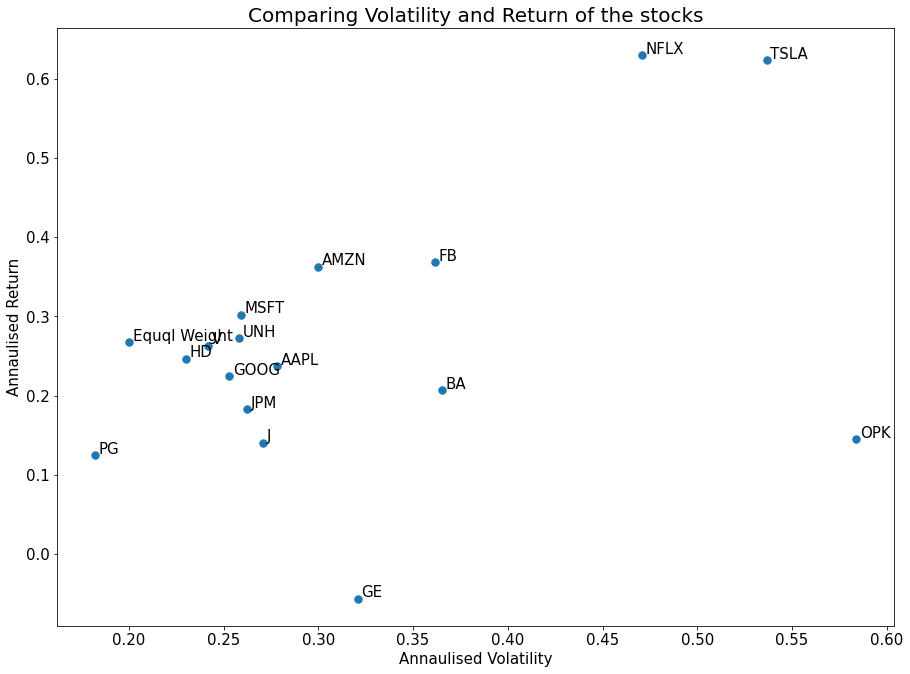

In [39]:
s_summary.plot(kind='scatter',x='Volatility',y='Return',figsize=(15,11),s=55, fontsize=15)
for i in s_summary.index:
    plt.annotate(i,xy=(s_summary.loc[i,'Volatility']+0.002, s_summary.loc[i,'Return']+0.002),size= 15)
plt.xlabel('Annaulised Volatility' , fontsize=15)
plt.ylabel('Annaulised Return' , fontsize=15)
plt.title('Comparing Volatility and Return of the stocks' , fontsize=20)
plt.show()

## Using Scipy's "minimize" function 

In [13]:
from scipy.optimize import minimize

In [14]:
stocks_ret= stock_tickers.pct_change(1).dropna()

In [15]:
riskFreeR=0.11

Creating the Objective Function

In [16]:
#calculating the annualised return using the weights as parameter
def getPReturn(weights):
    return stocks_ret.dot(weights.T).mean() * 252

In [17]:
#calculating the annualised volatility using the weights as parameter
def port_vol(weights):
    return stocks_ret.dot(weights.T).std() * np.sqrt(252)

In [18]:
#creating the function for minimising
def min_sharpe(weights): 
     return (riskFreeR -getPReturn(weights)) / port_vol(weights) 

In [19]:
# Creating a vector of equal weights as the initial guess
stocksNum = len(stocks_ret.columns)
stock_weights = [1 / stocksNum ] * stocksNum 
stock_weights

[0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625]

In [20]:
#setting the constraint: weights must sum up to 1 and sum of the weights - 1 must be 0
cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})

In [21]:
# the weights must be between 0 and 1
bounds =  tuple((0,1) for x in range(stocksNum))
bounds

((0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1))

In [22]:
#run optimisation based on the minimised function, starting with equal weights and based on respective bounds and constraints
results = minimize(min_sharpe, stock_weights, method = "SLSQP", bounds = bounds, constraints= cons)
results

     fun: -1.3494789200638446
     jac: array([-0.24705362, -0.37457187, -0.1014353 , -0.37473902,  0.68762481,
       -0.08607863, -0.34848258, -0.02088299, -0.10889095, -0.37508263,
       -0.37470233,  0.20630762, -0.19005704, -0.37460048, -0.37454499,
       -0.31692564])
 message: 'Optimization terminated successfully'
    nfev: 155
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.00000000e+00, 1.18007430e-01, 3.47994401e-16, 1.14675327e-01,
       3.26589968e-16, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.48360885e-02, 3.53842089e-01, 0.00000000e+00,
       0.00000000e+00, 2.41769442e-01, 1.46869623e-01, 0.00000000e+00])

In [23]:
#getting the optimal weights
optimal_weights = results["x"]
optimal_weights

array([0.00000000e+00, 1.18007430e-01, 3.47994401e-16, 1.14675327e-01,
       3.26589968e-16, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.48360885e-02, 3.53842089e-01, 0.00000000e+00,
       0.00000000e+00, 2.41769442e-01, 1.46869623e-01, 0.00000000e+00])

In [24]:
#return of the optimal portfolio
getPReturn(optimal_weights)

0.5062140355688783

In [25]:
#volatility of the optimal portfolio
port_vol(optimal_weights)

0.29360520544487884

In [26]:
#sharpe ratio of the optimal portfolio
-min_sharpe(optimal_weights)

1.3494789200638446

In [27]:
# Store the optimised weights as a dataframe object
optimal_weights = pd.DataFrame(results['x'])
optimal_weights

,0
0,0.000000e+00
1,1.180074e-01
2,3.479944e-16
3,1.146753e-01
4,3.265900e-16
5,0.000000e+00
6,0.000000e+00
7,0.000000e+00
8,0.000000e+00
9,2.483609e-02


In [28]:
# Set the tickers as the index of optimised_weights.
optimal_weights.index = stocks_ret.columns
optimal_weights

,0
AAPL,0.000000e+00
AMZN,1.180074e-01
BA,3.479944e-16
FB,1.146753e-01
GE,3.265900e-16
GOOG,0.000000e+00
HD,0.000000e+00
J,0.000000e+00
JPM,0.000000e+00
MSFT,2.483609e-02


In [29]:
optimal_weights.rename(columns={optimal_weights.columns[0] : 'Weight of Stocks in the portfolio'}, inplace=True)
optimal_weights

,Weight of Stocks in the portfolio
AAPL,0.000000e+00
AMZN,1.180074e-01
BA,3.479944e-16
FB,1.146753e-01
GE,3.265900e-16
GOOG,0.000000e+00
HD,0.000000e+00
J,0.000000e+00
JPM,0.000000e+00
MSFT,2.483609e-02


In [30]:
# rounding up the weights 
optimal_weights['weights_rounded'] = optimal_weights['Weight of Stocks in the portfolio'].apply(lambda x : round(x, 2))
optimal_weights 

,Weight of Stocks in the portfolio,weights_rounded
AAPL,0.000000e+00,0.00
AMZN,1.180074e-01,0.12
BA,3.479944e-16,0.00
FB,1.146753e-01,0.11
GE,3.265900e-16,0.00
GOOG,0.000000e+00,0.00
HD,0.000000e+00,0.00
J,0.000000e+00,0.00
JPM,0.000000e+00,0.00
MSFT,2.483609e-02,0.02


In [31]:
optimal_weights['weights_rounded'].sort_values(ascending=False).cumsum()

NFLX    0.35
TSLA    0.59
UNH     0.74
AMZN    0.86
FB      0.97
MSFT    0.99
V       0.99
PG      0.99
OPK     0.99
JPM     0.99
J       0.99
HD      0.99
GOOG    0.99
GE      0.99
BA      0.99
AAPL    0.99
Name: weights_rounded, dtype: float64

 # Achieving a Target Return with Scipy

In [72]:
T_returns = stock_tickers.pct_change(1).dropna()

In [73]:
# Setting the target return
target_return = 0.382699

Setting up constraints

3 constraints were set up

1. The weight of any of the stock  must be between 0 and 1
2. The sum of all the weights must equate to 1
3. The difference between the expected return and the target return on the portfolio must be equal to 0.

In [74]:
# the weights must be between 0 and 1
#bounds =  tuple((0,1) for x in range(stocksNum))
#bounds

In [75]:
cons2 = (
    # Sum of weights must equate to 1
    {'type' : 'eq', 'fun' : lambda w : np.sum(w) - 1},
    
    #  expected return - target = 0.
    {'type' : 'eq', 'fun' : lambda x : x.dot( T_returns.mean()) * 252 - target_return})

In [76]:
results = minimize(fun=getPReturn,  # the function
                   x0=stock_weights,  # the initial weight
                   # bounds: the constraint the weight b/w 0 and 1
                   bounds=bounds,
                   constraints=cons2)  #constraints 

In [77]:
results

     fun: 0.38269900033531234
     jac: array([ 0.23709358,  0.36276862,  0.20708555,  0.36893079, -0.05647867,
        0.22468359,  0.24666118,  0.14058441,  0.18241486,  0.30227008,
        0.62997815,  0.1448544 ,  0.12455448,  0.62325075,  0.27231282,
        0.26314038])
 message: 'Optimization terminated successfully'
    nfev: 34
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.05229209, 0.08729416, 0.04393441, 0.0890104 , 0.        ,
       0.04883569, 0.05495679, 0.02541304, 0.03706337, 0.07044456,
       0.16171542, 0.02660231, 0.0209485 , 0.15984174, 0.06210107,
       0.05954644])

In [78]:
# getting the output by passing in the optimised weights into getPReturn function
getPReturn(weights=results['x'])

0.38269900033531234

In [79]:
#Storing the optimised weights as a dataframe object
opt_weights = pd.DataFrame(results['x'])
opt_weights.index = stocks_ret.columns
opt_weights.rename(columns={opt_weights.columns[0] :'Individual Weight for the Target Return'}, inplace=True)
opt_weights

,Individual Weight for the Target Return
AAPL,0.052292
AMZN,0.087294
BA,0.043934
FB,0.089010
GE,0.000000
GOOG,0.048836
HD,0.054957
J,0.025413
JPM,0.037063
MSFT,0.070445


In [80]:
# rounding up the weights
opt_weights['formated_weights'] = opt_weights['Individual Weight for the Target Return'].apply(lambda x : round(x, 2))
opt_weights

,Individual Weight for the Target Return,formated_weights
AAPL,0.052292,0.05
AMZN,0.087294,0.09
BA,0.043934,0.04
FB,0.089010,0.09
GE,0.000000,0.00
GOOG,0.048836,0.05
HD,0.054957,0.05
J,0.025413,0.03
JPM,0.037063,0.04
MSFT,0.070445,0.07


In [81]:
opt_weights['formated_weights'].sort_values(ascending=False).cumsum()

TSLA    0.16
NFLX    0.32
FB      0.41
AMZN    0.50
MSFT    0.57
V       0.63
UNH     0.69
HD      0.74
GOOG    0.79
AAPL    0.84
JPM     0.88
BA      0.92
OPK     0.95
J       0.98
PG      1.00
GE      1.00
Name: formated_weights, dtype: float64